In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from google.colab import drive
import string
from collections import Counter

# drive.mount('/content/drive')
# DataPath = '/content/drive/MyDrive/New_Delhi_reviews.csv'
DataPath = '/Users/ratsimbazafy/Downloads/New_Delhi_reviews.csv'

In [2]:
df = pd.read_csv(DataPath).fillna('')
df = df.rename(columns={'rating_review': 'scores', 'review_full': 'reviews'})
df.head()

,scores,reviews
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


In [3]:
data = df.copy()

In [4]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147581 entries, 0 to 147580
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   scores   147581 non-null  int64 
 1   reviews  147581 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


,scores,reviews
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."


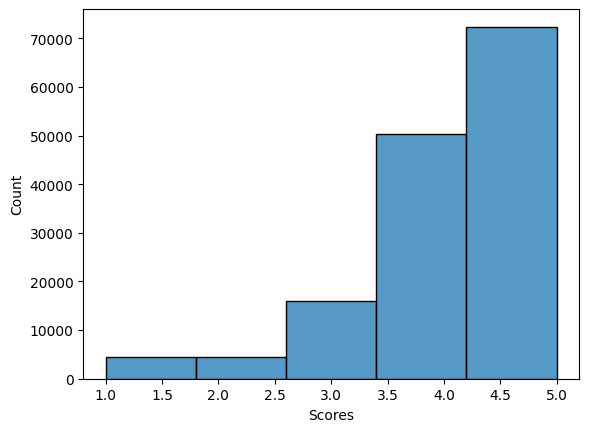

In [5]:
sns.histplot(data['scores'], bins=5, kde=False)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()

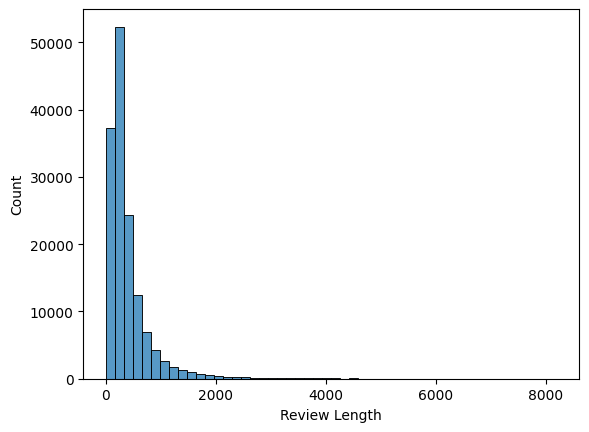

In [6]:
data['review_length'] = data['reviews'].apply(len)
data['review_length'].describe()

sns.histplot(data['review_length'], bins=50, kde=False)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

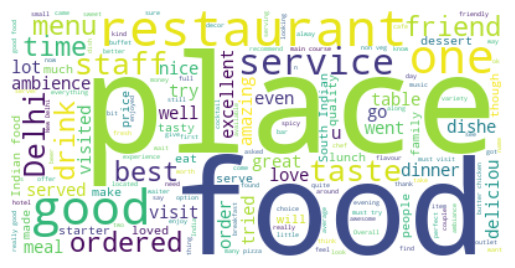

In [7]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white').generate(' '.join(data['reviews']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

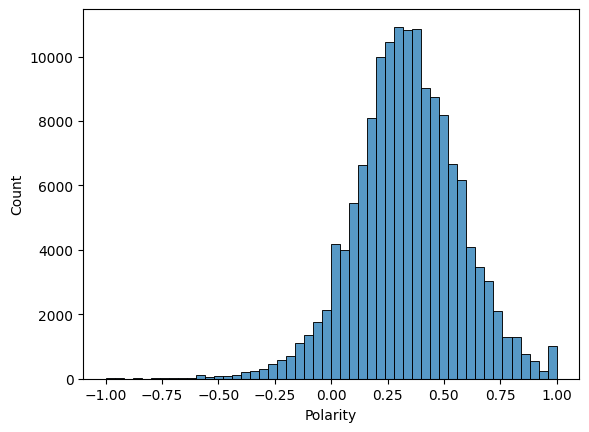

In [8]:
from textblob import TextBlob

data['polarity'] = data['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.histplot(data['polarity'], bins=50, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

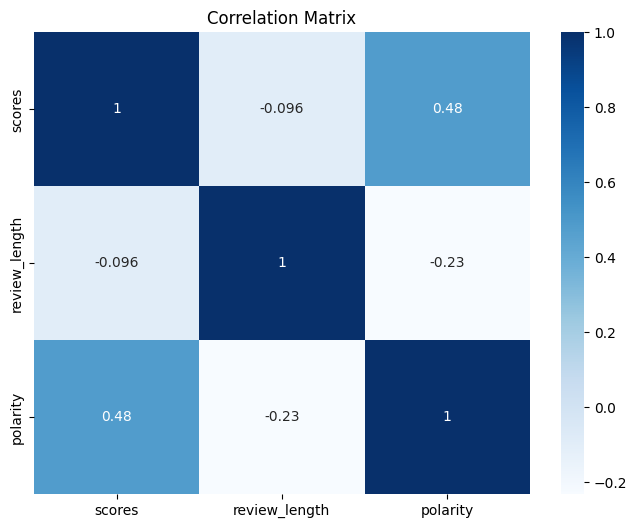

In [9]:
# Calculate the correlation between the scores, review lengths, and polarity scores
correlation = data[['scores', 'review_length', 'polarity']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [10]:
!pip install spacy --quiet
import spacy
!python3 -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

2023-08-06 21:05:07.937176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-08-06 21:05:16.616599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
exclude_words = list(stop_words)
exclude_words[:2]

['does', 'his']

In [12]:
def count_top_words(group, n=5, exclude_words=[]):
    text = ' '.join(group['reviews'])
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [w for w in words if w not in exclude_words]
    word_counts = Counter(words)
    return word_counts.most_common(n)

result = data.groupby('scores').apply(count_top_words, exclude_words=exclude_words)

In [13]:
result[4]

[('food', 46308),
 ('good', 41329),
 ('place', 34245),
 ('service', 16472),
 ('restaurant', 16379)]

In [14]:
with open('/Users/ratsimbazafy/Downloads/positive-words.txt', 'r') as file:
    lines = file.readlines()
    lines = [line.strip() for line in lines]
    file.close()

positive_words = [str(x) for x in lines]

with open('/Users/ratsimbazafy/Downloads/negative-words.txt', 'r') as file:
    lines = file.readlines()
    lines = [line.strip() for line in lines]
    file.close()

negative_words = [str(x) for x in lines]
negative_words[:2]

['2-faced', '2-faces']

In [15]:
#Average positive / negative sum per rating, for each rating category
def count_sent_words(group, n=20, words_list=[]):
    text = ' '.join(group['reviews'])
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [w for w in words if w in words_list]
    word_counts = Counter(words)
    return word_counts.most_common(n)

pos_result = data.groupby('scores').apply(count_sent_words, words_list=positive_words)
neg_result = data.groupby('scores').apply(count_sent_words, words_list=negative_words)

In [16]:
pos_result = list(pos_result)
pos_result[0]

[('good', 1460),
 ('like', 1217),
 ('better', 574),
 ('well', 531),
 ('recommend', 383),
 ('great', 341),
 ('available', 272),
 ('nice', 252),
 ('worth', 252),
 ('best', 249),
 ('top', 223),
 ('right', 199),
 ('fine', 174),
 ('fresh', 160),
 ('hot', 156),
 ('enough', 153),
 ('recommended', 143),
 ('sweet', 135),
 ('happy', 130),
 ('properly', 129)]

In [17]:
neg_result = list(neg_result)
neg_result[0]

[('bad', 1062),
 ('worst', 710),
 ('pathetic', 520),
 ('poor', 508),
 ('terrible', 404),
 ('rude', 398),
 ('cold', 389),
 ('horrible', 322),
 ('disappointed', 291),
 ('waste', 243),
 ('expensive', 218),
 ('stale', 197),
 ('refused', 187),
 ('hard', 172),
 ('wrong', 167),
 ('dirty', 167),
 ('slow', 166),
 ('disappointing', 164),
 ('sorry', 163),
 ('worse', 152)]

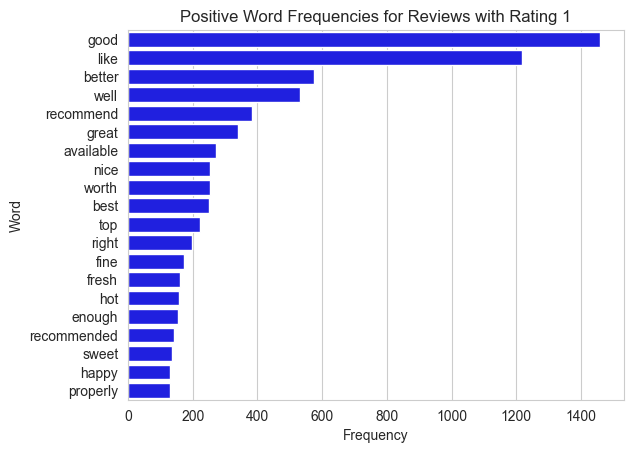

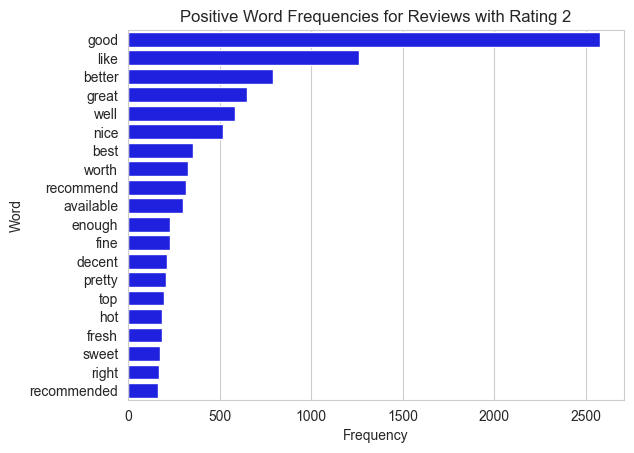

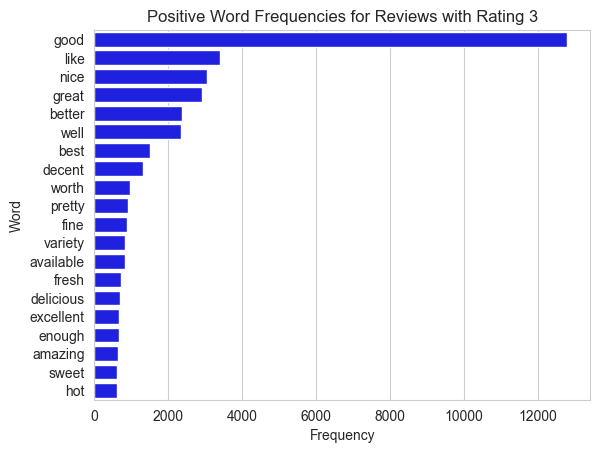

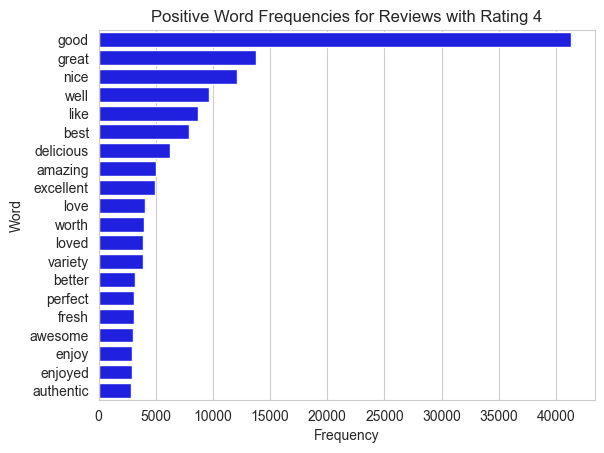

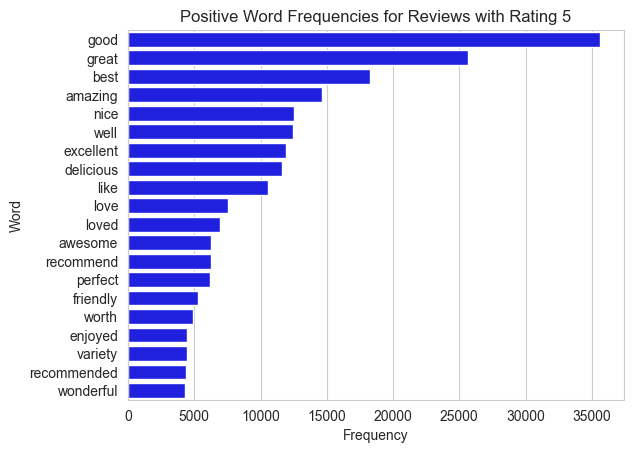

In [18]:
sub_indices = [pos_result[0], pos_result[1], pos_result[2], pos_result[3], pos_result[4]]

for i, sub_index in enumerate(sub_indices):
    # Convert the sub-index to a pandas dataframe
    df = pd.DataFrame(sub_index, columns=['word', 'frequency'])

    sns.set_style("whitegrid")
    sns.barplot(x='frequency', y='word', data=df, color='b')

    plt.title('Positive Word Frequencies for Reviews with Rating {}'.format(i+1))
    plt.xlabel('Frequency')
    plt.ylabel('Word')

    # Show the chart
    plt.show()

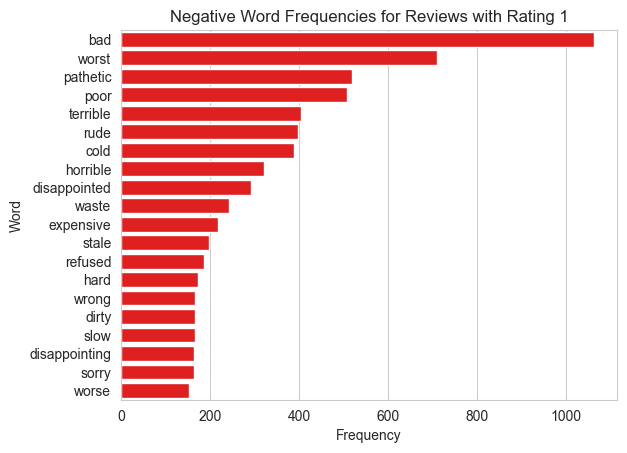

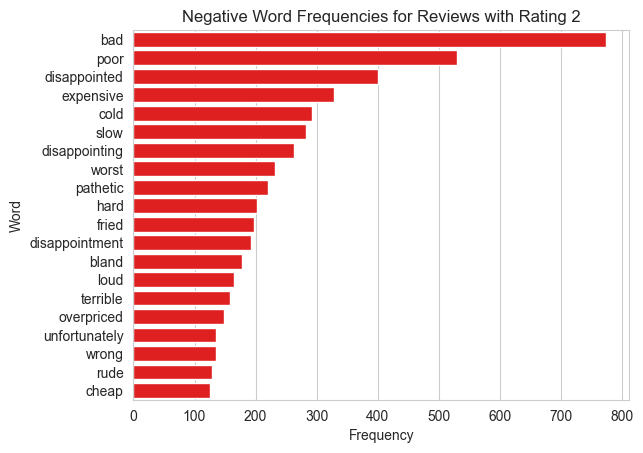

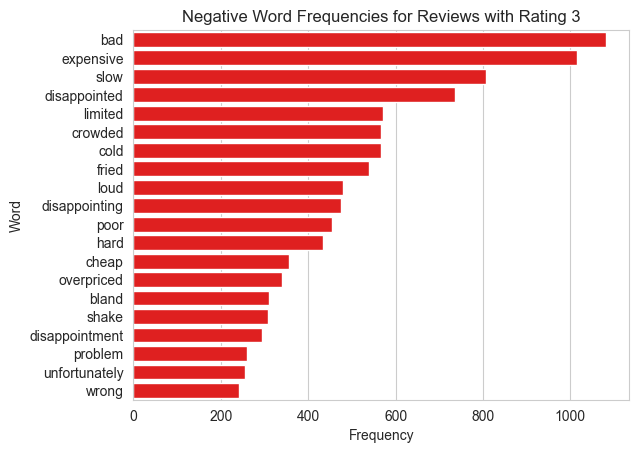

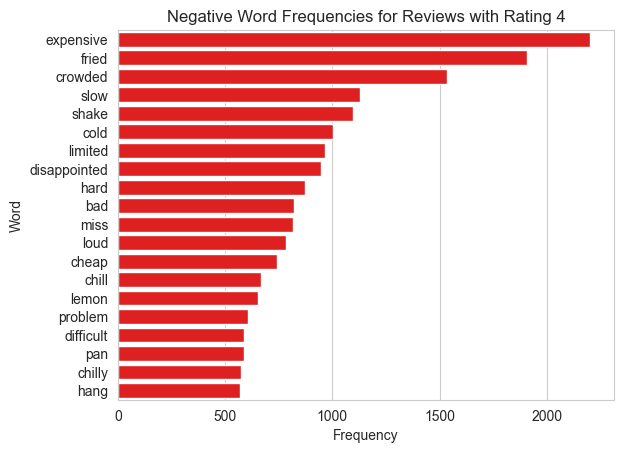

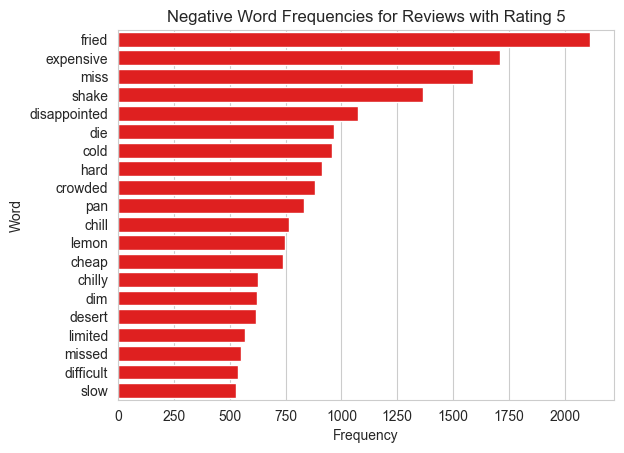

In [19]:
sub_indices = [neg_result[0], neg_result[1], neg_result[2], neg_result[3], neg_result[4]]

for i, sub_index in enumerate(sub_indices):
    # Convert the sub-index to a pandas dataframe
    df = pd.DataFrame(sub_index, columns=['word', 'frequency'])

    sns.set_style("whitegrid")
    sns.barplot(x='frequency', y='word', data=df, color='r')

    plt.title('Negative Word Frequencies for Reviews with Rating {}'.format(i+1))
    plt.xlabel('Frequency')
    plt.ylabel('Word')

    # Show the chart
    plt.show()

/var/folders/34/flzhm6td1k17tcywdrwjm9lh0000gn/T/ipykernel_26039/3705554628.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  random_reviews = random_reviews.append(subset, ignore_index=True)


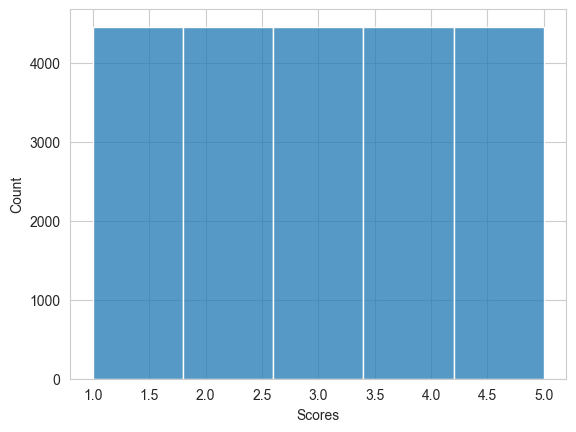

In [22]:
#Picking one approach to revolve class imbalance: randomly keep a number of reviews for each score based on category with smallest number of reviews
rating_counts = data['scores'].value_counts().loc[[1, 2, 3, 4, 5]]
min_count = rating_counts.min()

random_reviews = pd.DataFrame()

for rating in [1, 2, 3, 4, 5]:
    subset = data[data['scores'] == rating]

    if len(subset) > min_count:
        subset = subset.sample(n=min_count, random_state=42)

    random_reviews = random_reviews.append(subset, ignore_index=True)

random_reviews = random_reviews.sample(frac=1, random_state=42)

random_reviews.head()

sns.histplot(random_reviews['scores'], bins=5, kde=False)
plt.xlabel('Scores')
plt.ylabel('Count')
plt.show()

In [23]:
random_reviews.to_csv('/Users/ratsimbazafy/Downloads/random_reviews.csv', index=False)

In [24]:
random_reviews.head(20)

,scores,reviews,review_length,polarity
8262,2,Food was very disappointing. Most of the food ...,130,-0.316000
9538,3,"The food and service here is good. However, ha...",535,0.183333
22132,5,If u want to relax have the best drinks and mo...,107,0.700000
8341,2,I went along with my friends to this restauran...,336,-0.115833
6532,2,If good food is what u want to eat look somewh...,136,0.700000
4915,2,This place does not have much to speak off in ...,470,-0.030833
2420,1,The only reason this restaurant gets a terribl...,405,-0.150000
21110,5,This has great decor and nice ambiance . The f...,207,0.725000
3053,1,Visited with my friend during lunch hours. NO ...,605,0.084668
5135,2,We went to have lunch at this restaurant on Sa...,977,-0.020513


In [25]:
binary_reviews = pd.DataFrame()
binary_reviews = data.copy()
binary_reviews['scores'] = [1 if rating > 3 else 0 for rating in binary_reviews['scores']]

In [26]:
binary_reviews.to_csv('/Users/ratsimbazafy/Downloads/binary_reviews.csv', index=False)